In [1]:
%pip install python-mnist

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import dnn
import dnn.functional as F
from dnn.data import load_data_mnist
import dnn.nn as nn
import dnn.optim as optim
from dnn.train import train
import time
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
train_iter, test_iter, num_inputs, num_cls = load_data_mnist()
for iterator, name in ((train_iter, 'train_iter'), (test_iter, 'test_iter')):
    t = time.time()
    for _ in iterator:
        continue
    print(f'{time.time()-t} for {name}')

Loading MNIST dataset. 60000 items for training, 10000 items for testing. batch_size=64
X size: 784, MNIST image scale 28x28, total_cls=10.
0.11599111557006836 for train_iter
0.01797008514404297 for test_iter


## Model

In [3]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs, activation='relu'):
        super(MLP, self).__init__()
        if activation == 'relu':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.ReLU(), F.Linear(num_hiddens, num_outputs), F.Softmax()]
        elif activation == 'sigmoid':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.Sigmoid(), F.Linear(num_hiddens, num_outputs), F.Softmax()]

## Tuning
- All models are trained under num_epochs=50.

### ReLU v.s Sigmoid

- ReLU() is better than Sigmoid() after several epochs.

 20%|████████████████▍                                                                 | 10/50 [00:10<00:43,  1.09s/it]

result of epoch 10, train loss:1.097918207031707, train accuracy:82.69589552238806%
test loss:1.0221699925918728, test accuracy:83.38972929936305%


 40%|████████████████████████████████▊                                                 | 20/50 [00:21<00:31,  1.06s/it]

result of epoch 20, train loss:0.6484941394313547, train accuracy:84.78144989339019%
test loss:0.6164256512144476, test accuracy:85.24084394904459%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:33<00:22,  1.15s/it]

result of epoch 30, train loss:0.5060047456405901, train accuracy:86.06409914712152%
test loss:0.4894193684443861, test accuracy:86.4749203821656%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:44<00:11,  1.17s/it]

result of epoch 40, train loss:0.443954409199673, train accuracy:87.05856876332622%
test loss:0.43392580149568366, test accuracy:87.03224522292994%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:55<00:00,  1.12s/it]

result of epoch 50, train loss:0.40774615492501276, train accuracy:87.88812633262259%
test loss:0.40056981574462036, test accuracy:88.25636942675159%


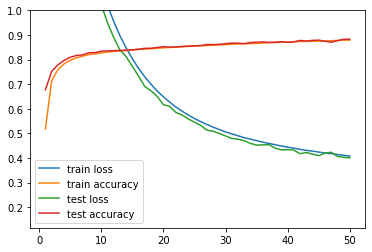

In [6]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:12<00:51,  1.28s/it]

result of epoch 10, train loss:1.1778824864937396, train accuracy:63.49280383795309%
test loss:1.1028489378107411, test accuracy:65.53542993630573%


 40%|████████████████████████████████▊                                                 | 20/50 [00:24<00:37,  1.25s/it]

result of epoch 20, train loss:0.8372812310797892, train accuracy:73.50579690831557%
test loss:0.8000489734448967, test accuracy:75.09952229299363%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:36<00:24,  1.21s/it]

result of epoch 30, train loss:0.7019582917931416, train accuracy:77.84848081023455%
test loss:0.6782021728132764, test accuracy:78.65246815286623%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:48<00:12,  1.21s/it]

result of epoch 40, train loss:0.6236770570693024, train accuracy:80.41877665245202%
test loss:0.6070812019385634, test accuracy:80.90167197452229%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.22s/it]

result of epoch 50, train loss:0.5715062679271473, train accuracy:82.10454424307036%
test loss:0.5588066722494389, test accuracy:82.84235668789809%


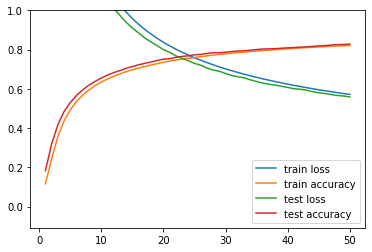

In [5]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'sigmoid'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

### Learning rate (0.05 v.s 0.1 v.s 0.5)

- Learning rate should be set larger to converge more quickly.

 20%|████████████████▍                                                                 | 10/50 [00:11<00:47,  1.20s/it]

result of epoch 10, train loss:0.9807631691902745, train accuracy:82.52098880597015%
test loss:0.9456498131268642, test accuracy:82.53383757961782%


 40%|████████████████████████████████▊                                                 | 20/50 [00:21<00:31,  1.05s/it]

result of epoch 20, train loss:0.630876870171774, train accuracy:85.05963486140725%
test loss:0.6237875042717931, test accuracy:85.12141719745223%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:32<00:23,  1.15s/it]

result of epoch 30, train loss:0.5113292419235049, train accuracy:86.55883528784648%
test loss:0.5065375608524576, test accuracy:86.68391719745223%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:44<00:11,  1.12s/it]

result of epoch 40, train loss:0.4513907671233844, train accuracy:87.4883395522388%
test loss:0.4570452899804151, test accuracy:87.16162420382165%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:55<00:00,  1.12s/it]

result of epoch 50, train loss:0.41433194690684144, train accuracy:88.34288379530916%
test loss:0.41611251091538354, test accuracy:88.39570063694268%


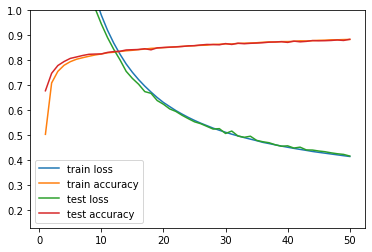

In [7]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.05, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:11<00:45,  1.14s/it]

result of epoch 10, train loss:0.6650525379436759, train accuracy:83.10734275053305%
test loss:0.6148926268909722, test accuracy:83.7579617834395%


 40%|████████████████████████████████▊                                                 | 20/50 [00:23<00:35,  1.19s/it]

result of epoch 20, train loss:0.4731116953952547, train accuracy:86.22567963752665%
test loss:0.4627414362910183, test accuracy:86.5545382165605%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:33<00:21,  1.07s/it]

result of epoch 30, train loss:0.40467194387079414, train accuracy:88.00473081023455%
test loss:0.4075845544376704, test accuracy:87.86823248407643%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:46<00:11,  1.20s/it]

result of epoch 40, train loss:0.36692438782961245, train accuracy:89.14745469083155%
test loss:0.3823888196999957, test accuracy:88.61464968152866%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:57<00:00,  1.16s/it]

result of epoch 50, train loss:0.3398675989674155, train accuracy:89.88706023454158%
test loss:0.3545678262662997, test accuracy:89.45063694267516%


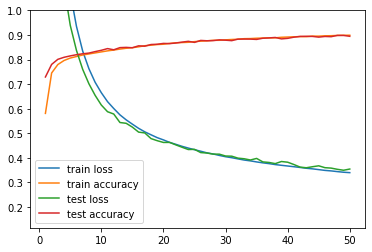

In [8]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.1, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:12<00:47,  1.19s/it]

result of epoch 10, train loss:0.37140836101184, train accuracy:89.00586353944563%
test loss:0.4297979063833587, test accuracy:86.9625796178344%


 40%|████████████████████████████████▊                                                 | 20/50 [00:23<00:34,  1.14s/it]

result of epoch 20, train loss:0.28302120629689964, train accuracy:91.56616471215352%
test loss:0.3142392251025866, test accuracy:90.60509554140127%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:34<00:21,  1.07s/it]

result of epoch 30, train loss:0.23872359814753236, train accuracy:92.89545575692964%
test loss:0.2610961939787651, test accuracy:92.42635350318471%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:46<00:12,  1.20s/it]

result of epoch 40, train loss:0.21127868557854168, train accuracy:93.69669509594883%
test loss:0.22780142408109078, test accuracy:93.23248407643312%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:57<00:00,  1.16s/it]

result of epoch 50, train loss:0.19165572543958448, train accuracy:94.30303837953092%
test loss:0.21502969851922715, test accuracy:94.03861464968153%


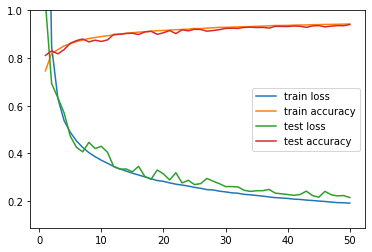

In [9]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

### Hidden Layers (64 v.s 128 v.s 256)

- Larger hidden layers can fit the training data better.
- But larger hidden layers causes overfitting.

 20%|████████████████▍                                                                 | 10/50 [00:10<00:43,  1.08s/it]

result of epoch 10, train loss:0.35264220386627576, train accuracy:89.62053571428571%
test loss:0.34226895052145784, test accuracy:89.95820063694268%


 40%|████████████████████████████████▊                                                 | 20/50 [00:22<00:33,  1.11s/it]

result of epoch 20, train loss:0.26867788825440175, train accuracy:91.9742803837953%
test loss:0.30276526903110096, test accuracy:91.17237261146497%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:33<00:23,  1.18s/it]

result of epoch 30, train loss:0.22576533470199817, train accuracy:93.21028784648188%
test loss:0.254843419446064, test accuracy:92.46616242038218%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:45<00:11,  1.13s/it]

result of epoch 40, train loss:0.19782479325140884, train accuracy:94.06982942430704%
test loss:0.244923065525098, test accuracy:93.0234872611465%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:57<00:00,  1.15s/it]

result of epoch 50, train loss:0.17837986255314597, train accuracy:94.68450159914713%
test loss:0.2209781956464969, test accuracy:93.56090764331209%


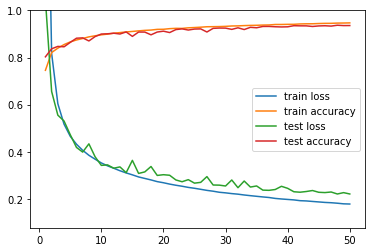

In [10]:
num_epochs, num_hiddens, lr, decay, activation = 50, 64, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:15<00:59,  1.48s/it]

result of epoch 10, train loss:0.3308207780152846, train accuracy:92.15918176972282%
test loss:0.37571883021818936, test accuracy:91.73964968152866%


 40%|████████████████████████████████▊                                                 | 20/50 [00:30<00:43,  1.45s/it]

result of epoch 20, train loss:0.2219939542270446, train accuracy:93.7633262260128%
test loss:0.28973410447256215, test accuracy:92.86425159235668%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:46<00:30,  1.54s/it]

result of epoch 30, train loss:0.179454274613587, train accuracy:94.7311433901919%
test loss:0.2523297141520379, test accuracy:93.60071656050955%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [01:01<00:14,  1.47s/it]

result of epoch 40, train loss:0.1536660984791044, train accuracy:95.54904051172709%
test loss:0.2479208043222172, test accuracy:93.50119426751591%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [01:15<00:00,  1.52s/it]

result of epoch 50, train loss:0.13457197209789695, train accuracy:96.01878997867804%
test loss:0.23369807861337652, test accuracy:94.07842356687898%


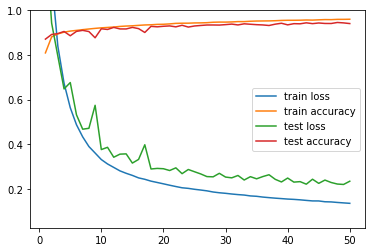

In [11]:
num_epochs, num_hiddens, lr, decay, activation = 50, 128, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:44<02:55,  4.39s/it]

result of epoch 10, train loss:0.31986613473927766, train accuracy:95.74560234541578%
test loss:0.5522076065510652, test accuracy:94.05851910828027%


 40%|████████████████████████████████▊                                                 | 20/50 [01:28<02:09,  4.33s/it]

result of epoch 20, train loss:0.1415177712594726, train accuracy:97.39805437100213%
test loss:0.4721069157747486, test accuracy:94.35708598726114%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:12<01:26,  4.34s/it]

result of epoch 30, train loss:0.07468384471629973, train accuracy:98.39418976545842%
test loss:0.43918954139468325, test accuracy:94.61584394904459%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:53<00:41,  4.14s/it]

result of epoch 40, train loss:0.04194094804450013, train accuracy:98.93556769722814%
test loss:0.41999916654251523, test accuracy:95.06369426751591%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]

result of epoch 50, train loss:0.02286884386296559, train accuracy:99.39532249466951%
test loss:0.4191729821016133, test accuracy:95.10350318471338%


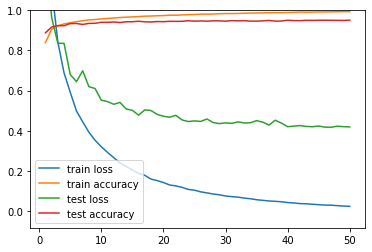

In [12]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

### Weight Decay (None v.s 1e-3 v.s 1e-4)

- Huge weight decay may lead to underfitting.
- But weight decay is helpful to avoid overfitting.

 20%|████████████████▍                                                                 | 10/50 [00:44<02:55,  4.39s/it]

result of epoch 10, train loss:0.31986613473927766, train accuracy:95.74560234541578%
test loss:0.5522076065510652, test accuracy:94.05851910828027%


 40%|████████████████████████████████▊                                                 | 20/50 [01:28<02:09,  4.33s/it]

result of epoch 20, train loss:0.1415177712594726, train accuracy:97.39805437100213%
test loss:0.4721069157747486, test accuracy:94.35708598726114%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:12<01:26,  4.34s/it]

result of epoch 30, train loss:0.07468384471629973, train accuracy:98.39418976545842%
test loss:0.43918954139468325, test accuracy:94.61584394904459%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [02:53<00:41,  4.14s/it]

result of epoch 40, train loss:0.04194094804450013, train accuracy:98.93556769722814%
test loss:0.41999916654251523, test accuracy:95.06369426751591%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:35<00:00,  4.31s/it]

result of epoch 50, train loss:0.02286884386296559, train accuracy:99.39532249466951%
test loss:0.4191729821016133, test accuracy:95.10350318471338%


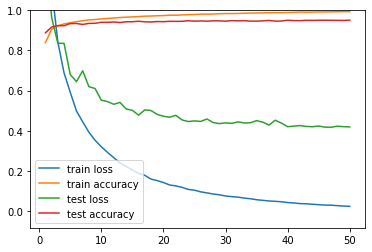

In [12]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, None, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:49<03:28,  5.22s/it]

result of epoch 10, train loss:0.2655721671235699, train accuracy:93.72667910447761%
test loss:0.2555657821174152, test accuracy:93.97890127388536%


 40%|████████████████████████████████▊                                                 | 20/50 [01:53<03:08,  6.30s/it]

result of epoch 20, train loss:0.25915979284040996, train accuracy:93.85660980810235%
test loss:0.2474781376508268, test accuracy:94.19785031847134%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:51<01:47,  5.37s/it]

result of epoch 30, train loss:0.2568956292590158, train accuracy:93.99486940298507%
test loss:0.2451213075212889, test accuracy:94.27746815286623%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:39<00:47,  4.79s/it]

result of epoch 40, train loss:0.2561079354682678, train accuracy:94.05483742004265%
test loss:0.24672121596030314, test accuracy:94.3172770700637%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:28<00:00,  5.36s/it]

result of epoch 50, train loss:0.25513158034226996, train accuracy:94.01819029850746%
test loss:0.24853951457946036, test accuracy:94.22770700636943%


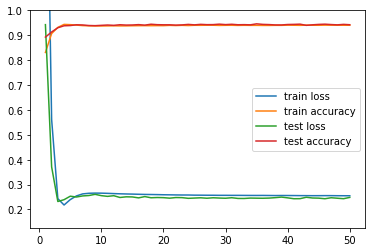

In [13]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, 1e-3, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

 20%|████████████████▍                                                                 | 10/50 [00:47<03:08,  4.71s/it]

result of epoch 10, train loss:0.17780170248267632, train accuracy:95.63732675906184%
test loss:0.1782792232579362, test accuracy:95.80015923566879%


 40%|████████████████████████████████▊                                                 | 20/50 [01:35<02:22,  4.77s/it]

result of epoch 20, train loss:0.1790403463510513, train accuracy:95.81889658848614%
test loss:0.1723199810398997, test accuracy:95.94944267515923%


 60%|█████████████████████████████████████████████████▏                                | 30/50 [02:23<01:35,  4.77s/it]

result of epoch 30, train loss:0.17514178443760547, train accuracy:95.9055170575693%
test loss:0.17083005141913243, test accuracy:95.85987261146497%


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [03:10<00:48,  4.89s/it]

result of epoch 40, train loss:0.17288894550091452, train accuracy:96.02878464818764%
test loss:0.16756110566739366, test accuracy:96.02906050955414%


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:59<00:00,  4.78s/it]

result of epoch 50, train loss:0.17161732764711418, train accuracy:96.05876865671642%
test loss:0.16592087071312073, test accuracy:96.05891719745223%


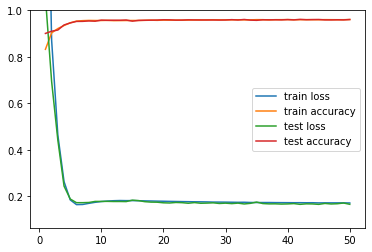

In [16]:
num_epochs, num_hiddens, lr, decay, activation = 50, 256, 0.5, 5e-4, 'relu'
mlp = MLP(num_inputs, num_hiddens, num_cls, activation)
loss = F.CrossEntropyLoss(mlp)
trainer = optim.SGD(mlp, lr=lr, decay=decay)
history = train(mlp, train_iter, test_iter, loss, trainer, num_epochs, inter_show=10)
for h in history:
    plt.plot(np.arange(len(h)) + 1, h)
plt.legend(['train loss', 'train accuracy', 'test loss', 'test accuracy'])
plt.ylim(top=1)
plt.show()

In [21]:
import pickle
with open('./model/mnist_hidden_256.pkl','wb') as f:
    pickle.dump(mlp, f)